# Explorative notebook of the matches database

In [1]:
from models import Match, Team, Championship, db, get_results
import pandas as pd

## First example. Load the 2010 championship

In [2]:
championship=Championship.get(startyear=2010)

### List the teams that competed in the 2010 championship

In [3]:
for team in championship.playing_teams:
    print(team)

Udinese
Roma
Bari
Chievoverona
Fiorentina
Milan
Palermo
Parma
Sampdoria
Bologna
Cesena
Catania
Juventus
Lecce
Genoa
Lazio
Napoli
Inter
Cagliari
Brescia


### Compute the final ranking, convert it in a dataframe and display it 

In [27]:
championship_ranking=sorted(list(championship.compute_ranking()),key=lambda d: d['points'],reverse=True)
rankingdf = pd.DataFrame(championship_ranking)
rankingdf

,team,points,played,won,even,lost,scored,taken
0,Milan,82,38,24,10,4,65,24
1,Inter,76,38,23,7,8,69,42
2,Napoli,70,38,21,7,10,59,39
3,Udinese,66,38,20,6,12,65,43
4,Lazio,66,38,20,6,12,55,39
5,Roma,63,38,18,9,11,59,52
6,Juventus,58,38,15,13,10,57,47
7,Palermo,56,38,17,5,16,58,63
8,Fiorentina,51,38,12,15,11,49,44
9,Genoa,51,38,14,9,15,45,47


### Investigate the stats of the main derbies

In [8]:
roma = Team.get(Team.name.contains("Roma"))
lazio = Team.get(Team.name.contains("Lazio"))
derbies_Rome = Match.select().where(((Match.team1 == roma) & (Match.team2 == lazio)) | (
    (Match.team2 == roma) & (Match.team1 == lazio)))
pd.DataFrame([get_results(team, derbies_Rome) for team in (roma, lazio)])


,team,points,played,won,even,lost,scored,taken
0,Roma,95,66,23,26,17,88,74
1,Lazio,77,66,17,26,23,74,88


In [9]:
milan = Team.get(Team.name.contains("Milan"))
inter = Team.get(Team.name.contains("Inter"))
derbies_Milan = Match.select().where(((Match.team1 == inter) & (Match.team2 == milan)) | (
    (Match.team2 == inter) & (Match.team1 == milan)))
pd.DataFrame([get_results(team, derbies_Milan) for team in (milan, inter)])


,team,points,played,won,even,lost,scored,taken
0,Milan,91,70,24,19,27,89,92
1,Inter,100,70,27,19,24,92,89


In [10]:
juventus = Team.get(Team.name.contains("Juventus"))
turin = Team.get(Team.name.contains("Torino"))
derbies_Turin = Match.select().where(((Match.team1 == juventus) & (Match.team2 == turin)) | (
    (Match.team2 == juventus) & (Match.team1 == turin)))
pd.DataFrame([get_results(team, derbies_Turin) for team in (juventus, turin)])


,team,points,played,won,even,lost,scored,taken
0,Juventus,99,46,29,12,5,81,39
1,Torino,27,46,5,12,29,39,81


### Explore the details of the Milan performances in the championships from 1986 to 2021

In [28]:
matches=[Match.select().where(((Match.team1 == milan) | (
    Match.team2 == milan)) & (Match.championship == Championship.get(startyear=year))) for year in range(1986,2021)]


In [34]:
details_milan = pd.DataFrame([get_results(milan, ch) for ch in matches])
details_milan["Year"] = pd.Series(range(1986, 2021))
details_milan.drop('team',axis='columns', inplace=True)

In [35]:
ranking = [next((index for index, d in enumerate(sorted(list(Championship.get(startyear=year).compute_ranking()),
                                              key=lambda d: d['points'], reverse=True)) if d.get("team") == milan.name), None)+1 for year in range(1986, 2021)]


In [36]:
details_milan['Ranking'] = ranking


In [37]:
details_milan

,points,played,won,even,lost,scored,taken,Year,Ranking
0,48,30,13,9,8,31,21,1986,5
1,62,30,17,11,2,43,14,1987,1
2,62,34,16,14,4,61,25,1988,3
3,71,34,22,5,7,56,27,1989,2
4,64,34,18,10,6,46,19,1990,2
5,78,34,22,12,0,74,21,1991,1
6,68,34,18,14,2,65,32,1992,1
7,69,34,19,12,3,36,15,1993,1
8,60,34,17,9,8,53,32,1994,4
9,73,34,21,10,3,60,24,1995,1


## Data can be visualized with seaborn

In [38]:
import seaborn as sns

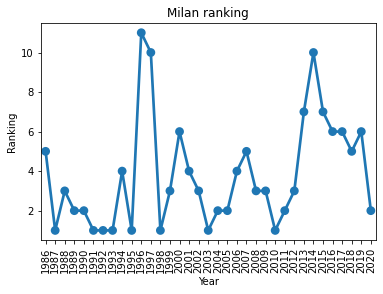

In [47]:
plt=sns.pointplot(data=details_milan,x="Year",y="Ranking")
plt.set_xticklabels(plt.get_xticklabels(),rotation=90);
plt.set(title="Milan ranking");


[Text(0.5, 1.0, 'Milan ranking')]

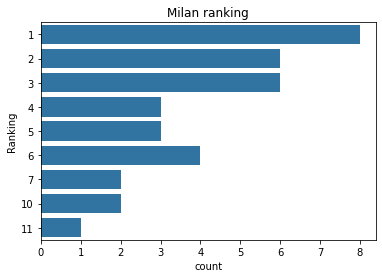

In [53]:
plt = sns.countplot(data=details_milan, y="Ranking",color=sns.color_palette()[0])
plt.set(title="Milan ranking")
